In [2]:
!python --version

Python 3.11.7


In [3]:
!pip install matplotlib

In [1]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
open('hora-2-derecha.txt')

<_io.TextIOWrapper name='hora-2-derecha.txt' mode='r' encoding='cp1252'>

In [7]:
datos = pd.read_csv('hora-2-derecha.txt', sep=' ')

In [8]:
datos.head()

,Unnamed: 0,Tiempo,Densidad
0,NaN,83000.0,15.43
1,NaN,83001.0,16.92
2,NaN,83002.0,18.05
3,NaN,83003.0,18.05
4,NaN,83004.0,19.32


In [9]:
datos = datos.drop(['Unnamed: 0'], axis=1)

In [10]:
datos.head()

,Tiempo,Densidad
0,83000.0,15.43
1,83001.0,16.92
2,83002.0,18.05
3,83003.0,18.05
4,83004.0,19.32


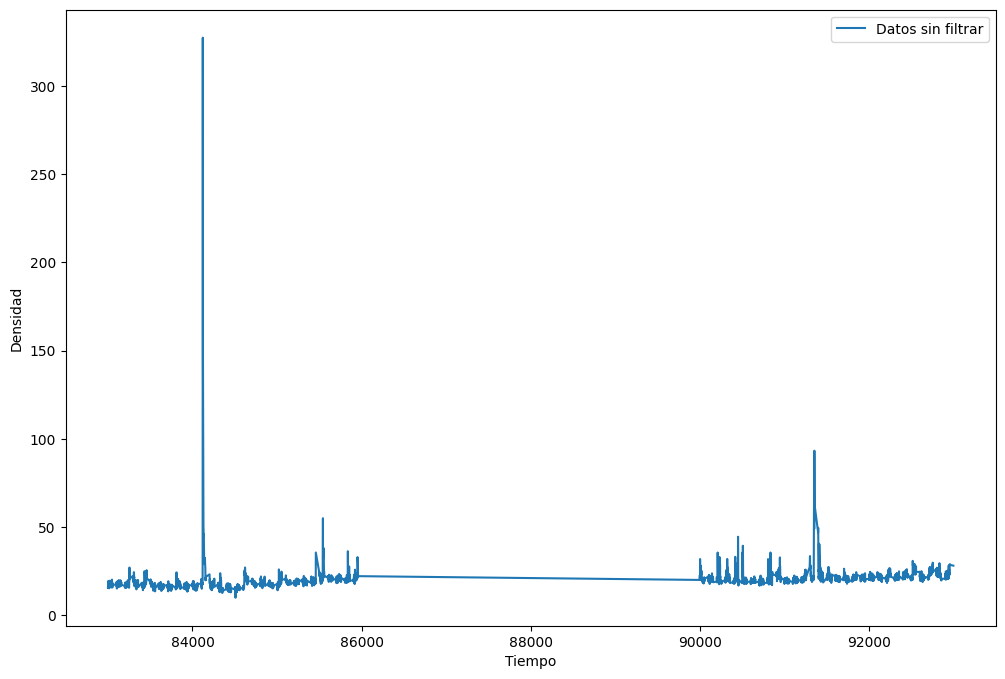

In [11]:
plt.figure(figsize=(12,8))

plt.plot(datos.Tiempo, datos.Densidad, label='Datos sin filtrar')

plt.xlabel('Tiempo')
plt.ylabel('Densidad')
plt.legend()
plt.show()

In [12]:
datos.shape

(3601, 2)

In [13]:
vo = []
vo.append(0)
vi = datos.Densidad

T=0.00001
RC = 1/(2*np.pi*100)

for k in range(datos.shape[0]-1):
    vo.append(vo[k]*(1-(T/RC)) + (T/RC)*vi[k])

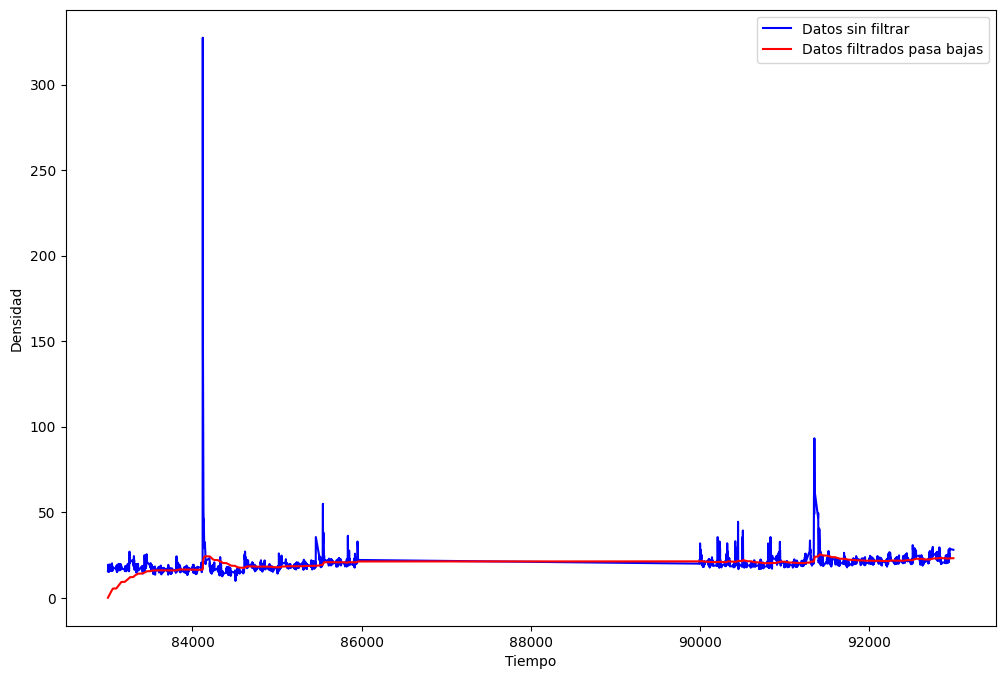

In [14]:
plt.figure(figsize=(12,8))

plt.plot(datos.Tiempo, vi, color='blue', label='Datos sin filtrar')
plt.plot(datos.Tiempo, vo, color='red', label='Datos filtrados pasa bajas')

plt.xlabel('Tiempo')
plt.ylabel('Densidad')
plt.legend()
plt.show()

In [15]:
datos_filtrados = vi-vo
positivos_filtrados = []
for i in range(len(datos_filtrados)):
    if (datos_filtrados[i]>=0):
        positivos_filtrados.append(datos_filtrados[i])
    else:
        positivos_filtrados.append(0)

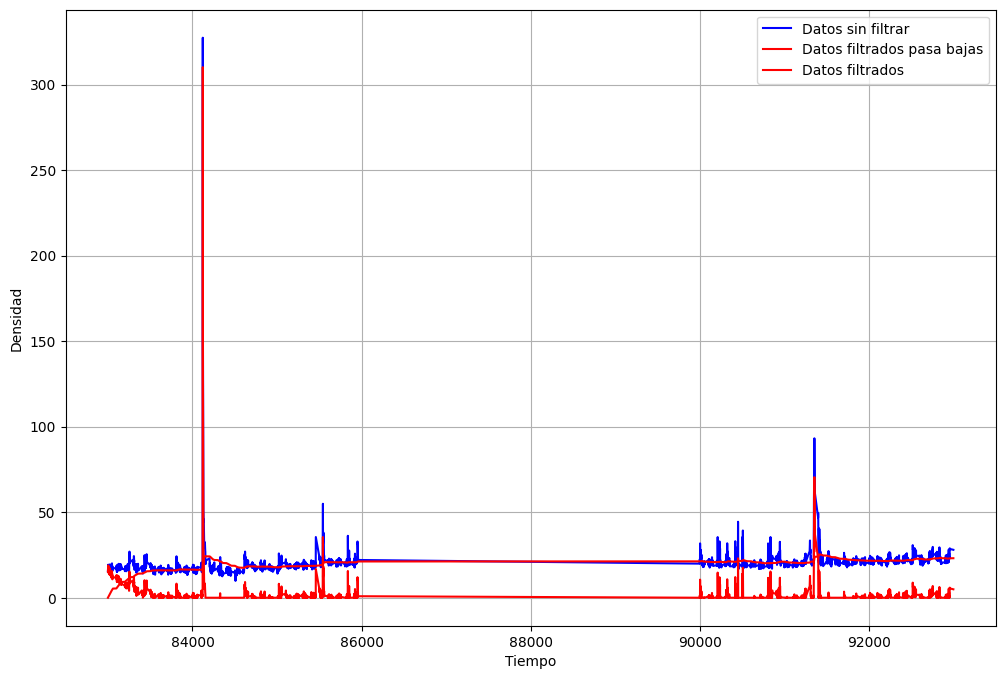

In [16]:
plt.figure(figsize=(12,8))

plt.plot(datos.Tiempo, vi, color='blue', label='Datos sin filtrar')
plt.plot(datos.Tiempo, vo, color='red', label='Datos filtrados pasa bajas')
plt.plot(datos.Tiempo, positivos_filtrados, color='red', label='Datos filtrados')

plt.xlabel('Tiempo')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

In [17]:
datos_filtrados_dados = pd.read_csv('hora-2-derecha-filtrada-bajas.txt', sep=' ')

In [18]:
datos_filtrados_dados.head()

,Tiempo,Densidad,Densidad_filtrada,h
0,1.0,15.43,0.001331,NaN
1,2.0,16.92,0.002794,NaN
2,3.0,18.05,0.004359,NaN
3,4.0,18.05,0.005929,NaN
4,5.0,19.32,0.007614,NaN


In [19]:
df_filtrados_dados = datos_filtrados_dados.drop(['h'], axis=1)

In [20]:
df_filtrados_dados.head()

,Tiempo,Densidad,Densidad_filtrada
0,1.0,15.43,0.001331
1,2.0,16.92,0.002794
2,3.0,18.05,0.004359
3,4.0,18.05,0.005929
4,5.0,19.32,0.007614


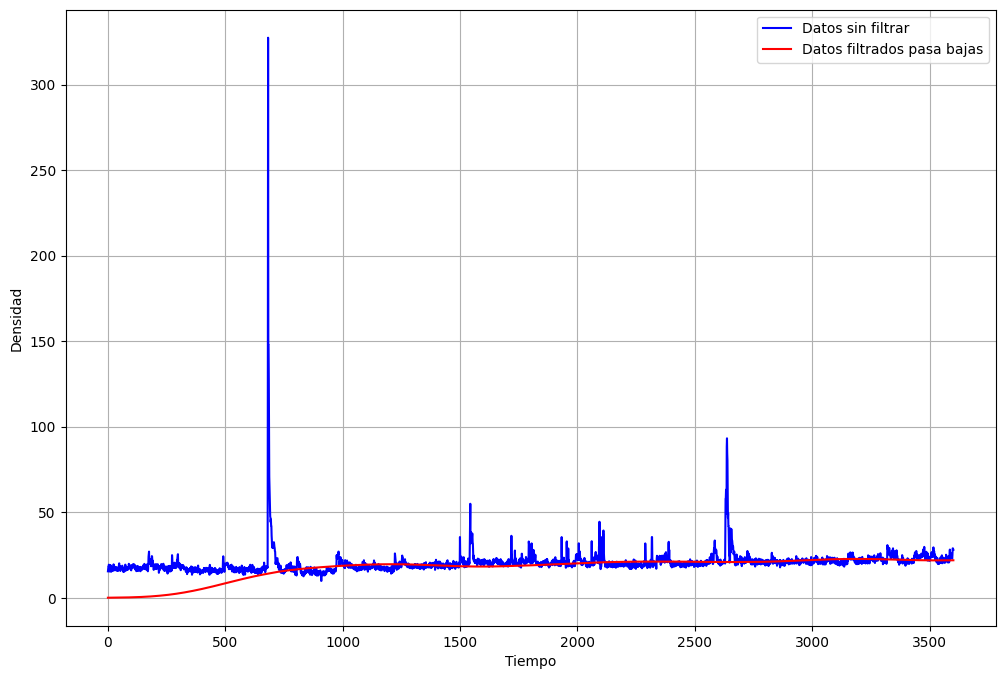

In [21]:
plt.figure(figsize=(12,8))

plt.plot(df_filtrados_dados.Tiempo, df_filtrados_dados.Densidad, color='blue', label='Datos sin filtrar')
plt.plot(df_filtrados_dados.Tiempo, df_filtrados_dados.Densidad_filtrada, color='red', label='Datos filtrados pasa bajas')
# plt.plot(datos.Tiempo, positivos_filtrados, color='red', label='Datos filtrados')

plt.xlabel('Tiempo')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

In [22]:
vo = []
vo.append(20)
vi = df_filtrados_dados.Densidad

T=0.00001
RC = 1/(2*np.pi*100)



for k in range(df_filtrados_dados.shape[0]-1):
    cambio = vo[k]*(1-(T/RC)) + (T/RC)*vi[k]
    peso = cambio/vo[-1]
    if (peso>=1.01):
        vo.append(vo[-1])
    else:
        vo.append(cambio)

In [23]:
datos_filtrados = vi-vo
positivos_filtrados = []
for i in range(len(datos_filtrados)):
    if (datos_filtrados[i]>=0):
        positivos_filtrados.append(datos_filtrados[i])
    else:
        positivos_filtrados.append(0)

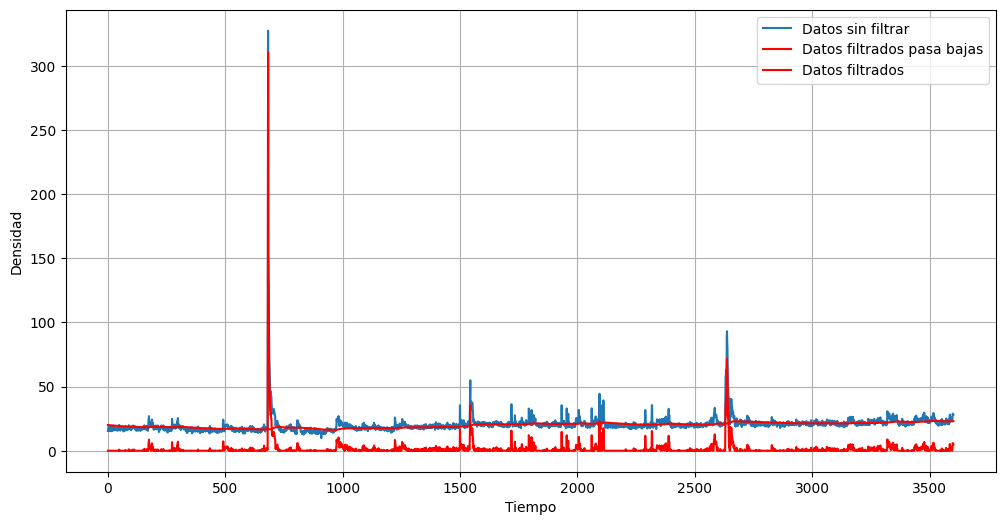

In [24]:
plt.figure(figsize=(12,6))

plt.plot(df_filtrados_dados.Tiempo, vi, label='Datos sin filtrar')
plt.plot(df_filtrados_dados.Tiempo, vo, color='red', label='Datos filtrados pasa bajas')
plt.plot(df_filtrados_dados.Tiempo, positivos_filtrados, color='red', label='Datos filtrados')

plt.xlabel('Tiempo')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

# Filtro FIR

In [25]:
# Decibeles del rizado
# Amplitud de rizado de 0.01
print(20*np.log10(0.01), "dB")

-40.0 dB


Elejimos una ventana tipo Hanning

La frecuencia de corte según el doctor Aron Jazcivelich que sea de aproximadamente $f_c = 5.554x10^{-4}$ $Hz$

La banda de transición suponemos inicialmente de $\Delta \omega = 0.0001\pi$ 

In [26]:
#w_c
(5.554*10**(-4))*(2*np.pi)

0.0034896811196075427

In [27]:
0.0001*np.pi

0.0003141592653589793

In [28]:
(8)/(0.0001)

80000.0

Elejimos una ventana tipo Hanning

La frecuencia de corte que sea de aproximadamente $f_c = 5.554x10^{-1}$ $Hz$

La banda de transición suponemos inicialmente de $\Delta \omega = 0.0001\pi$ 

In [29]:
#w_c
(5.554*10**(-1))*(2*np.pi)

3.489681119607542

In [30]:
0.1*np.pi

0.3141592653589793

In [31]:
(8)/(0.1)

80.0

In [32]:
# W_c = (w_p + w_s)/2
print("w_c = ", (0.555 + 0.655)/2, "Pi")

w_c =  0.605 Pi


In [33]:
6.2/0.1

62.0

## Diseño del filtro 

In [34]:
#Filtro pasa bajas

def hn_id(wc, M, n):
    return (np.sin(wc*(n-M/2)))/(np.pi*(n-M/2))

C:\Users\Emiliano\AppData\Local\Temp\ipykernel_14876\2767048271.py:4: RuntimeWarning: invalid value encountered in divide
  return (np.sin(wc*(n-M/2)))/(np.pi*(n-M/2))


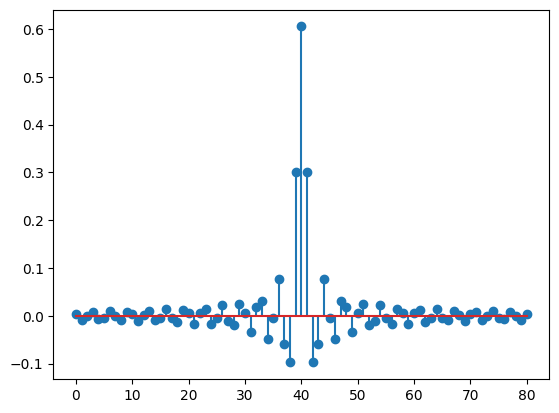

In [35]:
N = 81
M = N-1
wc = 0.605*np.pi
n = np.arange(0,N)

#Coeficientes de la ventana ideal
hid = hn_id(wc, M, n)
hid[int(M/2)] = wc/(np.pi)

plt.stem(hid)
plt.show()

In [36]:
#Usar la ventana de Hanning

def ventanaHanning(M, n):
    return 0.5*(1-np.cos((2*np.pi*n)/M))

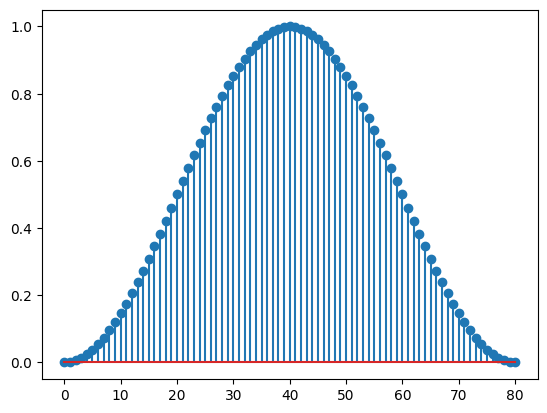

In [37]:
ventana = ventanaHanning(M, n) 

plt.stem(ventana)
plt.show()

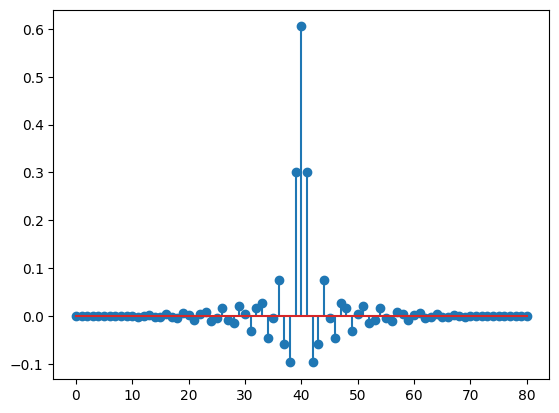

In [38]:
#Obtenemos los coeficientes multiplicados por la ventana

h = ventana*hid

plt.stem(h)
plt.show()

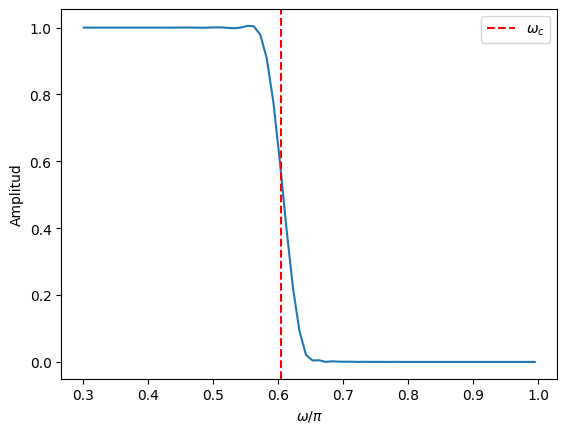

In [39]:
#Graficamos la magnitud de la respuesta en frecuencia

respuestaf = np.abs(np.fft.fft(h, 200))
w = np.linspace(0,2, 200)

plt.plot(w[30:100], respuestaf[30:100])
plt.axvline(0.605, linestyle = '--', color = 'red', label = '$\omega_c$')
plt.xlabel("$\omega / \pi$")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

# Aplicando a datos

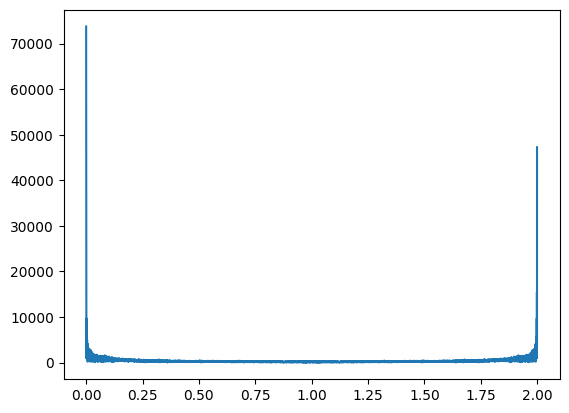

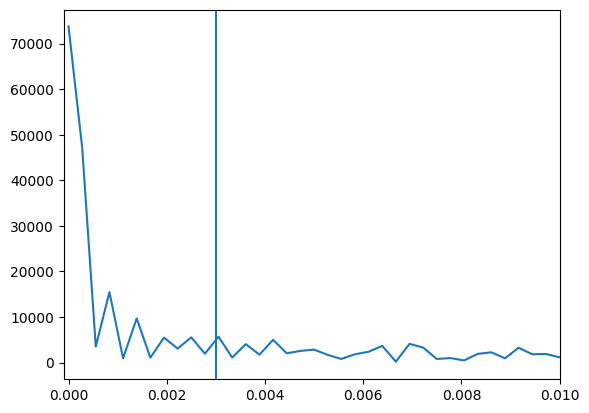

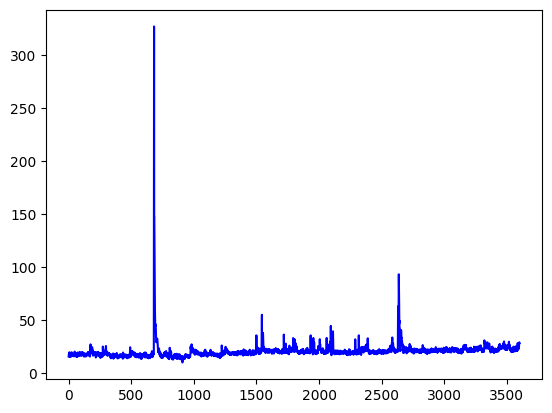

In [40]:
#Calculemos el ancho de banda del ruido

datos_trans_furier = np.abs(np.fft.fft(df_filtrados_dados.Densidad, len(df_filtrados_dados.Densidad)*2))

frec_w = np.linspace(0,2, len(df_filtrados_dados.Densidad)*2)

plt.plot(frec_w, datos_trans_furier)
plt.show()

plt.plot(frec_w, datos_trans_furier)
plt.axvline(0.003)  #Frecuencia dada por el Dr.
plt.xlim(-0.0001,0.01)
plt.show()

plt.plot(df_filtrados_dados.Tiempo, df_filtrados_dados.Densidad, color='blue', label='Datos sin filtrar')
plt.show()

In [41]:
6.2/0.001

6200.0

C:\Users\Emiliano\AppData\Local\Temp\ipykernel_14876\2767048271.py:4: RuntimeWarning: invalid value encountered in divide
  return (np.sin(wc*(n-M/2)))/(np.pi*(n-M/2))


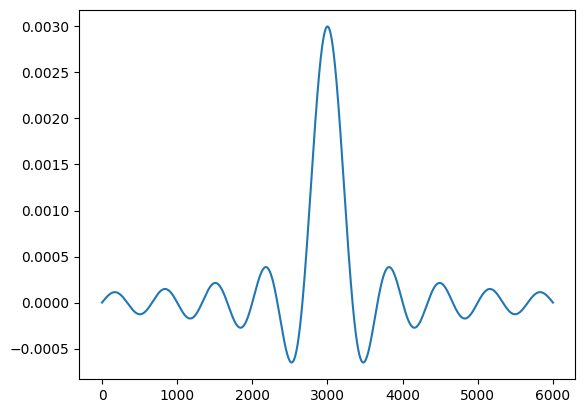

In [42]:
N = 6001
M = N-1
wc = 0.003*np.pi
n = np.arange(0,N)

#Coeficientes de la ventana ideal
hid = hn_id(wc, M, n)
hid[int(M/2)] = wc/(np.pi)

plt.plot(hid)
plt.show()

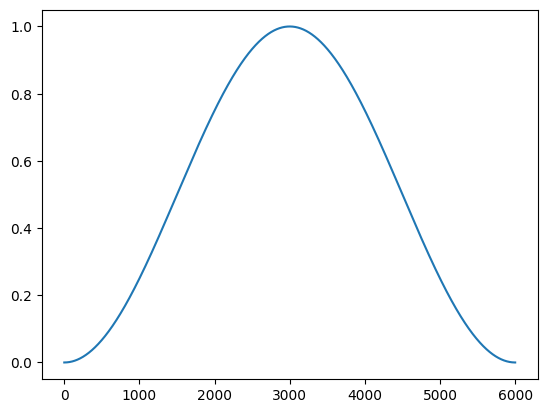

In [43]:
ventana = ventanaHanning(M, n) 

plt.plot(ventana)
plt.show()

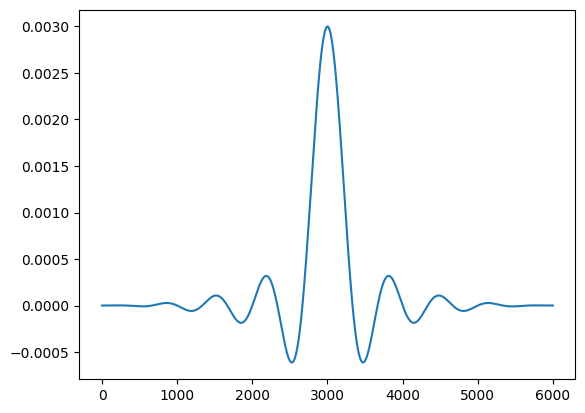

In [44]:
h = ventana*hid

plt.plot(h)
plt.show()

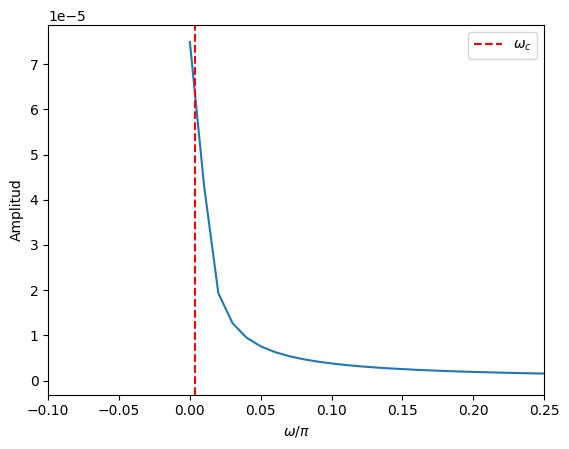

In [45]:
#Graficamos la magnitud de la respuesta en frecuencia

respuestaf = np.abs(np.fft.fft(h, 200))
w = np.linspace(0,2, 200)

plt.plot(w, respuestaf)
plt.axvline(0.00333, linestyle = '--', color = 'red', label = '$\omega_c$')
plt.xlabel("$\omega / \pi$")
plt.ylabel("Amplitud")
plt.xlim(-0.1, 0.25)
plt.legend()
plt.show()

In [50]:
dataFiltrada = np.convolve(df_filtrados_dados.Densidad[:], h)
print(h.shape)
print(dataFiltrada.shape)
print(df_filtrados_dados.Densidad.shape)
print(h)

(6001,)
(9601,)
(3601,)
[0.00000000e+00 2.74243008e-13 2.19457780e-12 ... 2.19457780e-12
 2.74243008e-13 0.00000000e+00]


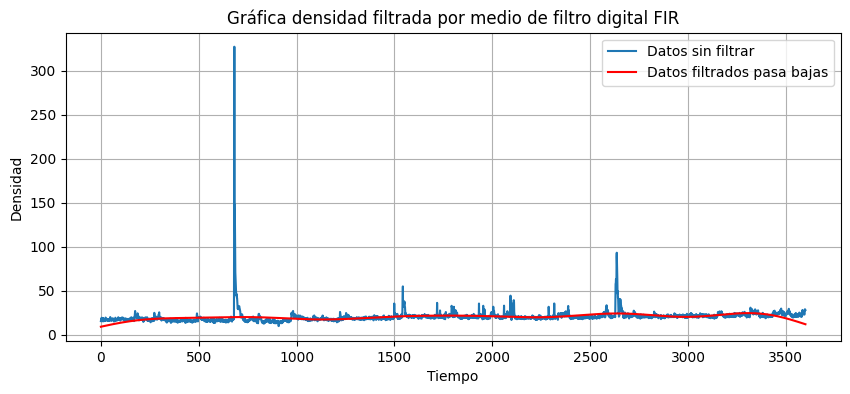

In [47]:
#Filtrado

dataFiltrada = np.convolve(df_filtrados_dados.Densidad[:], h)

plt.figure(figsize=(10,4))
plt.title("Gráfica densidad filtrada por medio de filtro digital FIR")
plt.plot(df_filtrados_dados.Densidad[:], label='Datos sin filtrar')
plt.plot(dataFiltrada[3000:-3000], color='red', label='Datos filtrados pasa bajas')

plt.xlabel('Tiempo')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

# Filtro FIR en tiempo real, usando libreria scipy.signal

In [3]:
import scipy.signal as signal

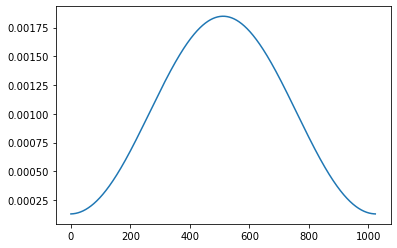

In [4]:
N_coef = 1024  #Propuesto por el doctor Aron Jazilevich
# wc = 0.003*np.pi
fc = 5.554*10**(-4)
# n = np.arange(0,N)   #Propuesto por el doctor Aron Jazilevich

h_prueba = signal.firwin(N_coef, fc, window='hamming')    #Ventana hamming

plt.plot(h_prueba)
plt.show()

In [5]:
dataFiltrada = np.convolve(df_filtrados_dados.Densidad[:], h_prueba, mode='full')

datos_no_graficar = int((len(dataFiltrada)-len(df_filtrados_dados.Densidad))/2)

plt.figure(figsize=(10,4))
plt.title("Gráfica densidad filtrada por medio de filtro digital FIR")
plt.plot(df_filtrados_dados.Densidad[:], label='Datos sin filtrar')
plt.plot(dataFiltrada[datos_no_graficar:-datos_no_graficar], color='red', label='Datos filtrados pasa bajas')

plt.xlabel('Tiempo')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

NameError: name 'df_filtrados_dados' is not defined

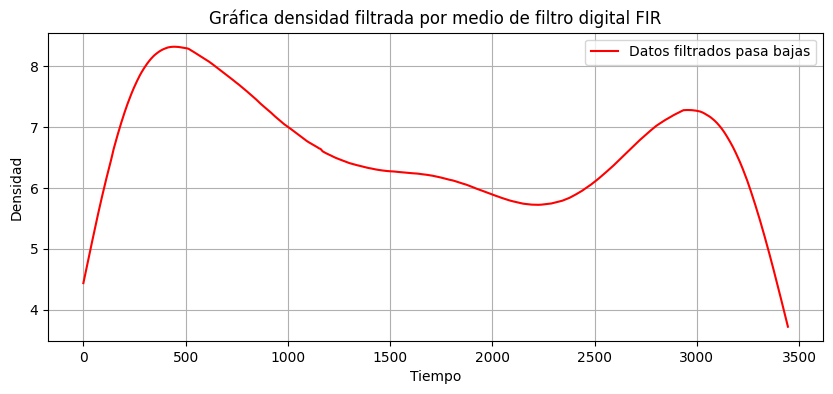

In [211]:
plt.figure(figsize=(10,4))
plt.title("Gráfica densidad filtrada por medio de filtro digital FIR")
plt.plot(dataFiltrada[datos_no_graficar:-datos_no_graficar], color='red', label='Datos filtrados pasa bajas')

plt.xlabel('Tiempo')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

In [220]:
print(len(h_prueba))
print(len(df_filtrados_dados.Densidad))
print(len(dataFiltrada[15:-15]))

1024
3601
4594


In [12]:
buffer_size = N_coef
# input_buffer = np.zeros(buffer_size)

def filtro_tiempo_real(nuevo_dato):
    input_buffer[:-1] = input_buffer[1:]
    input_buffer[-1] = nuevo_dato
    output = np.convolve(input_buffer, h_prueba, mode='valid')
    return output[-1]

y = []

input_buffer = np.zeros(buffer_size) + df_filtrados_dados.Densidad[0]
for i in df_filtrados_dados.Densidad[:]: 
    y.append(filtro_tiempo_real(i))


NameError: name 'df_filtrados_dados' is not defined

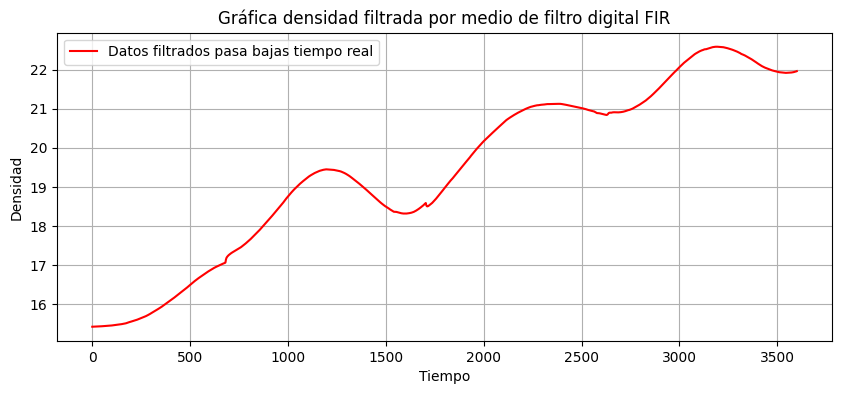

In [222]:
plt.figure(figsize=(10,4))
plt.title("Gráfica densidad filtrada por medio de filtro digital FIR")
plt.plot(y, color='red', label='Datos filtrados pasa bajas tiempo real')

plt.xlabel('Tiempo')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

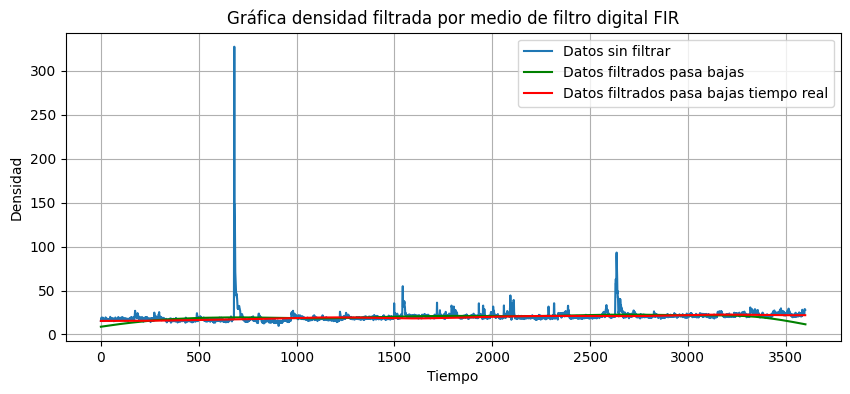

In [223]:
plt.figure(figsize=(10,4))
plt.title("Gráfica densidad filtrada por medio de filtro digital FIR")
plt.plot(df_filtrados_dados.Densidad[:], label='Datos sin filtrar')
plt.plot(dataFiltrada[datos_no_graficar:-datos_no_graficar], color='green', label='Datos filtrados pasa bajas')
plt.plot(y, color='red', label='Datos filtrados pasa bajas tiempo real')

plt.xlabel('Tiempo')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

In [198]:
df = pd.read_csv('datosSensorPM2_5_2024_04_06_hora_11_00_46.txt', sep=',')
print(df.head())

       Tiempo  Concentracion  SenalFondo
0  1712422848           10.0         0.0
1  1712422849           10.0         0.0
2  1712422850           10.0         0.0
3  1712422851           10.0         0.0
4  1712422852           11.0         0.0


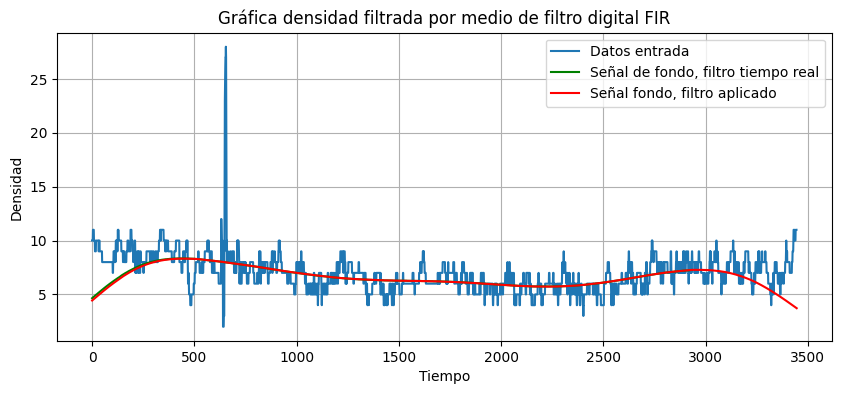

In [210]:
dataFiltrada = np.convolve(df.Concentracion[:], h_prueba, mode='full')

datos_no_graficar = int((len(dataFiltrada)-len(df.Concentracion))/2)
x = np.arange(len(df.SenalFondo[512:]))
plt.figure(figsize=(10,4))
plt.title("Gráfica densidad filtrada por medio de filtro digital FIR")
plt.plot(df.Concentracion[:], label='Datos entrada')
plt.plot(x[:], df.SenalFondo[512:], color = 'green', label = "Señal de fondo, filtro tiempo real")
plt.plot(dataFiltrada[datos_no_graficar:-datos_no_graficar], color='red', label='Señal fondo, filtro aplicado')

plt.xlabel('Tiempo')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

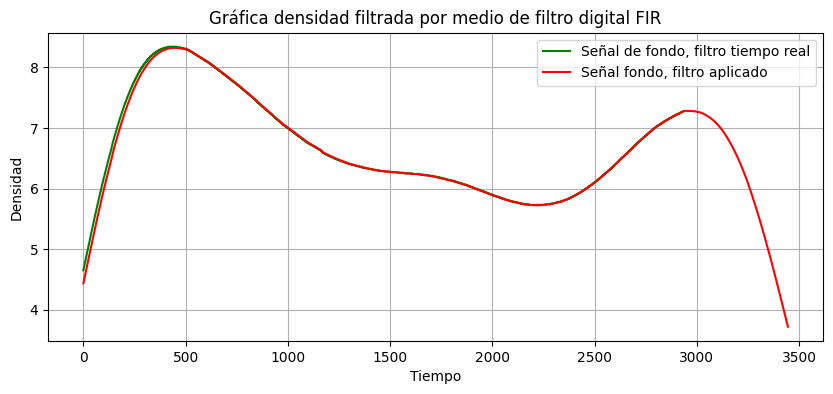

In [202]:

plt.figure(figsize=(10,4))
plt.title("Gráfica densidad filtrada por medio de filtro digital FIR")
plt.plot(x[:], df.SenalFondo[512:], color = 'green', label = "Señal de fondo, filtro tiempo real")
plt.plot(dataFiltrada[datos_no_graficar:-datos_no_graficar], color='red', label='Señal fondo, filtro aplicado')

plt.xlabel('Tiempo')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

In [144]:
buffer_size = int(N_coef)
MinDatosFiltro = int(buffer_size)

# input_buffer = np.zeros(buffer_size)

def filtro_tiempo_real(nuevo_dato):
    input_buffer[:-1] = input_buffer[1:]
    input_buffer[-1] = nuevo_dato
    if (input_buffer[0] != 0):
        output = np.convolve(input_buffer, h_prueba, mode='valid')
    else:
        output = [0]
    return output[-1]

y = []
resta = []
contador = MinDatosFiltro
input_buffer = np.zeros(buffer_size) 
for i in df.Concentracion:
    datofiltrado = filtro_tiempo_real(i)
    contador -= 1
    if (datofiltrado == 0):
        print("Cargando datos para el filtro")
        print("Faltan {} datos mas" .format(contador))
    else:
        y.append(datofiltrado)

    resta.append(i - datofiltrado)


Cargando datos para el filtro
Faltan 1023 datos mas
Cargando datos para el filtro
Faltan 1022 datos mas
Cargando datos para el filtro
Faltan 1021 datos mas
Cargando datos para el filtro
Faltan 1020 datos mas
Cargando datos para el filtro
Faltan 1019 datos mas
Cargando datos para el filtro
Faltan 1018 datos mas
Cargando datos para el filtro
Faltan 1017 datos mas
Cargando datos para el filtro
Faltan 1016 datos mas
Cargando datos para el filtro
Faltan 1015 datos mas
Cargando datos para el filtro
Faltan 1014 datos mas
Cargando datos para el filtro
Faltan 1013 datos mas
Cargando datos para el filtro
Faltan 1012 datos mas
Cargando datos para el filtro
Faltan 1011 datos mas
Cargando datos para el filtro
Faltan 1010 datos mas
Cargando datos para el filtro
Faltan 1009 datos mas
Cargando datos para el filtro
Faltan 1008 datos mas
Cargando datos para el filtro
Faltan 1007 datos mas
Cargando datos para el filtro
Faltan 1006 datos mas
Cargando datos para el filtro
Faltan 1005 datos mas
Cargando dat

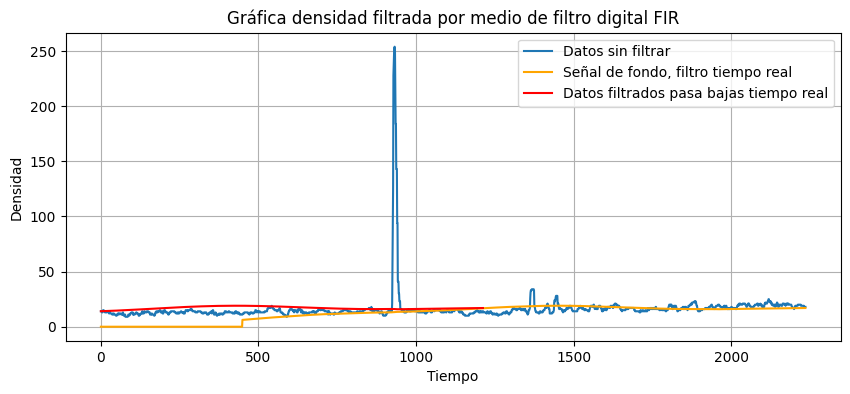

In [145]:
plt.figure(figsize=(10,4))
plt.title("Gráfica densidad filtrada por medio de filtro digital FIR")
plt.plot(df.Concentracion[:], label='Datos sin filtrar')
# plt.plot(dataFiltrada[datos_no_graficar:-datos_no_graficar], color='green', label='Datos filtrados pasa bajas')
plt.plot(df.SenalFondo[:], color = 'orange', label = "Señal de fondo, filtro tiempo real")
plt.plot(y, color='red', label='Datos filtrados pasa bajas tiempo real')
# plt.plot(resta, color = 'green')

plt.xlabel('Tiempo')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

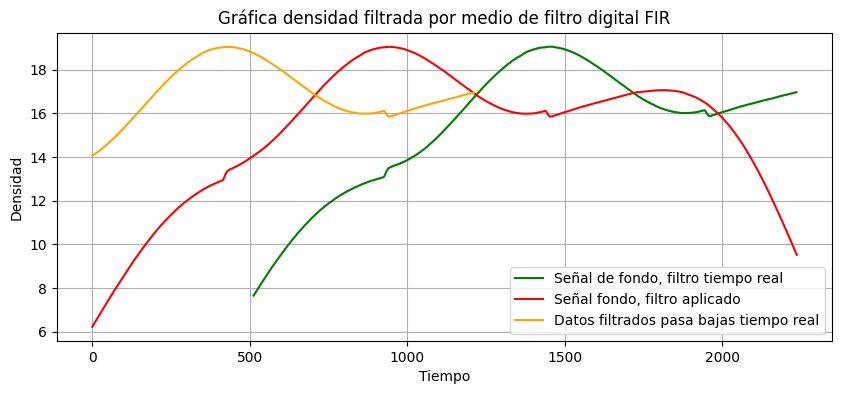

In [146]:
plt.figure(figsize=(10,4))
plt.title("Gráfica densidad filtrada por medio de filtro digital FIR")
plt.plot(df.SenalFondo[512:], color = 'green', label = "Señal de fondo, filtro tiempo real")
plt.plot(dataFiltrada[datos_no_graficar:-datos_no_graficar], color='red', label='Señal fondo, filtro aplicado')
plt.plot(y, color='orange', label='Datos filtrados pasa bajas tiempo real')
plt.xlabel('Tiempo')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

In [147]:
buffer_size = int(N_coef)
MinDatosFiltro = int(buffer_size)

# input_buffer = np.zeros(buffer_size)

def filtro_tiempo_real(nuevo_dato):
    input_buffer[1:] = input_buffer[:-1]
    input_buffer[0] = nuevo_dato
    # if (input_buffer[0] != 0):
    #     output = np.convolve(input_buffer, h_prueba, mode='valid')
    # else:
    #     output = [0]
    
    output = np.convolve(input_buffer, h_prueba, mode='valid')
    return output[-1]
    
y = []
resta = []
# contador = MinDatosFiltro
input_buffer = np.zeros(buffer_size) 
for i in df.Concentracion:
    datofiltrado = filtro_tiempo_real(i)
    # contador -= 1
    # if (datofiltrado == 0):
    #     print("Cargando datos para el filtro")
    #     print("Faltan {} datos mas" .format(contador))
    # else:
    #     y.append(datofiltrado)
    
    y.append(datofiltrado)
    resta.append(i - datofiltrado)


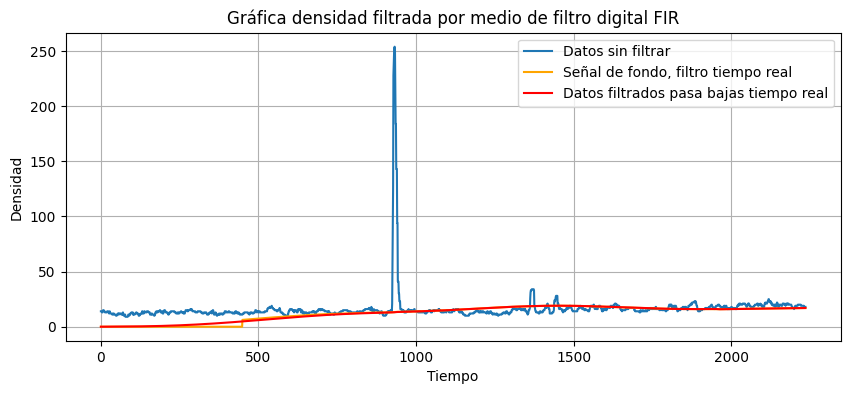

In [148]:
plt.figure(figsize=(10,4))
plt.title("Gráfica densidad filtrada por medio de filtro digital FIR")
plt.plot(df.Concentracion[:], label='Datos sin filtrar')
# plt.plot(dataFiltrada[datos_no_graficar:-datos_no_graficar], color='green', label='Datos filtrados pasa bajas')
plt.plot(df.SenalFondo[:], color = 'orange', label = "Señal de fondo, filtro tiempo real")
plt.plot(y, color='red', label='Datos filtrados pasa bajas tiempo real')
# plt.plot(resta, color = 'green')

plt.xlabel('Tiempo')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

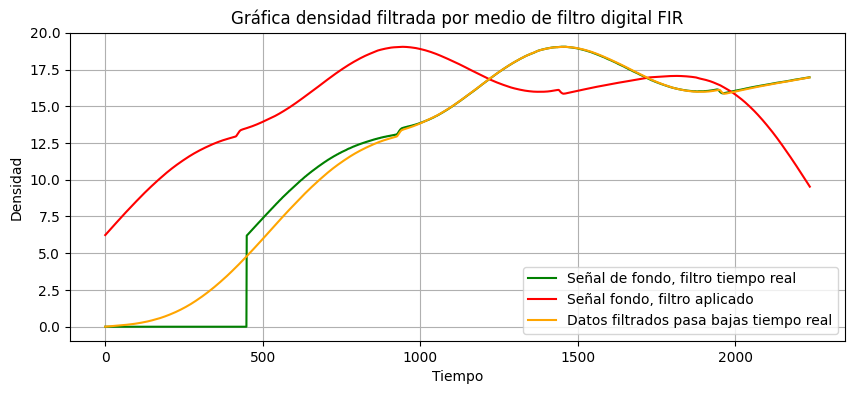

In [149]:
plt.figure(figsize=(10,4))
plt.title("Gráfica densidad filtrada por medio de filtro digital FIR")
plt.plot(df.SenalFondo[:], color = 'green', label = "Señal de fondo, filtro tiempo real")
plt.plot(dataFiltrada[datos_no_graficar:-datos_no_graficar], color='red', label='Señal fondo, filtro aplicado')
plt.plot(y, color='orange', label='Datos filtrados pasa bajas tiempo real')
plt.xlabel('Tiempo')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

In [183]:
buffer_size = int(N_coef)
MinDatosFiltro = int(buffer_size/2)

# input_buffer = np.zeros(buffer_size)

def filtro_tiempo_real(nuevo_dato):
    input_buffer[:-1] = input_buffer[1:]
    input_buffer[-1] = nuevo_dato
    # if (input_buffer[0] != 0):
    #     output = np.convolve(input_buffer, h_prueba, mode='valid')
    # else:
    #     output = [0]
    output = np.convolve(input_buffer, h_prueba, mode='valid')
    return output[-1]

y = []
# resta = []
# contador = MinDatosFiltro
input_buffer = np.zeros(buffer_size) 
for i in df.Concentracion:
    datofiltrado = filtro_tiempo_real(i)
    # contador -= 1
    # if (datofiltrado == 0):
    #     print("Cargando datos para el filtro")
    #     print("Faltan {} datos mas" .format(contador))
    # else:
    #     y.append(datofiltrado)
    y.append(datofiltrado)
    # resta.append(i - datofiltrado)


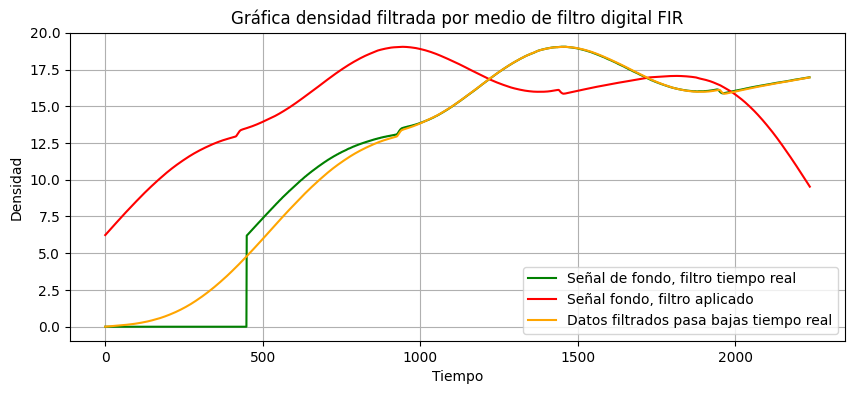

In [184]:
plt.figure(figsize=(10,4))
plt.title("Gráfica densidad filtrada por medio de filtro digital FIR")
plt.plot(df.SenalFondo[:], color = 'green', label = "Señal de fondo, filtro tiempo real")
plt.plot(dataFiltrada[datos_no_graficar:-datos_no_graficar], color='red', label='Señal fondo, filtro aplicado')
plt.plot(y, color='orange', label='Datos filtrados pasa bajas tiempo real')
plt.xlabel('Tiempo')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

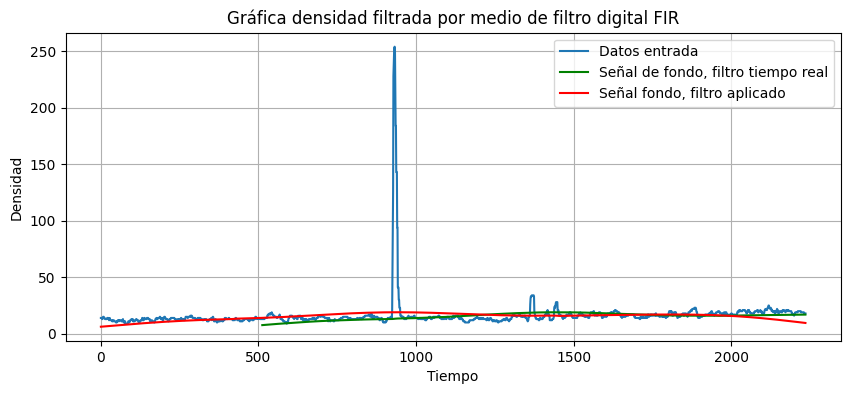

In [130]:
dataFiltrada = np.convolve(df.Concentracion[:], h_prueba, mode='same')

datos_no_graficar = int((len(dataFiltrada)-len(df.Concentracion))/2)

plt.figure(figsize=(10,4))
plt.title("Gráfica densidad filtrada por medio de filtro digital FIR")
plt.plot(df.Concentracion[:], label='Datos entrada')
plt.plot(df.SenalFondo[512:], color = 'green', label = "Señal de fondo, filtro tiempo real")
plt.plot(dataFiltrada[:], color='red', label='Señal fondo, filtro aplicado')

plt.xlabel('Tiempo')
plt.ylabel('Densidad')
plt.legend()
plt.grid()
plt.show()

# Toberas

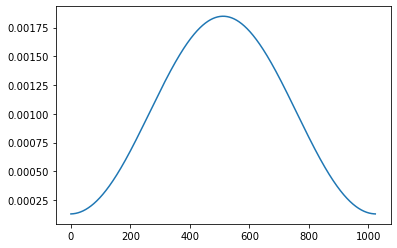

In [7]:
N_coef = 1024  #Propuesto por el doctor Aron Jazilevich
# wc = 0.003*np.pi
fc = 5.554*10**(-4)
# n = np.arange(0,N)   #Propuesto por el doctor Aron Jazilevich

h = signal.firwin(N_coef, fc, window='hamming')    #Ventana hamming

plt.plot(h)
plt.show()

In [6]:
sinTobera = pd.read_csv('datosSensorPM2_5_sin_tobera.txt')
toberaTransparente = pd.read_csv('datosSensorPM2_5_tobera_transparente.txt')
toberaBlanca = pd.read_csv('datosSensorPM2_5_tobera_blanca.txt')

## Sin tobera

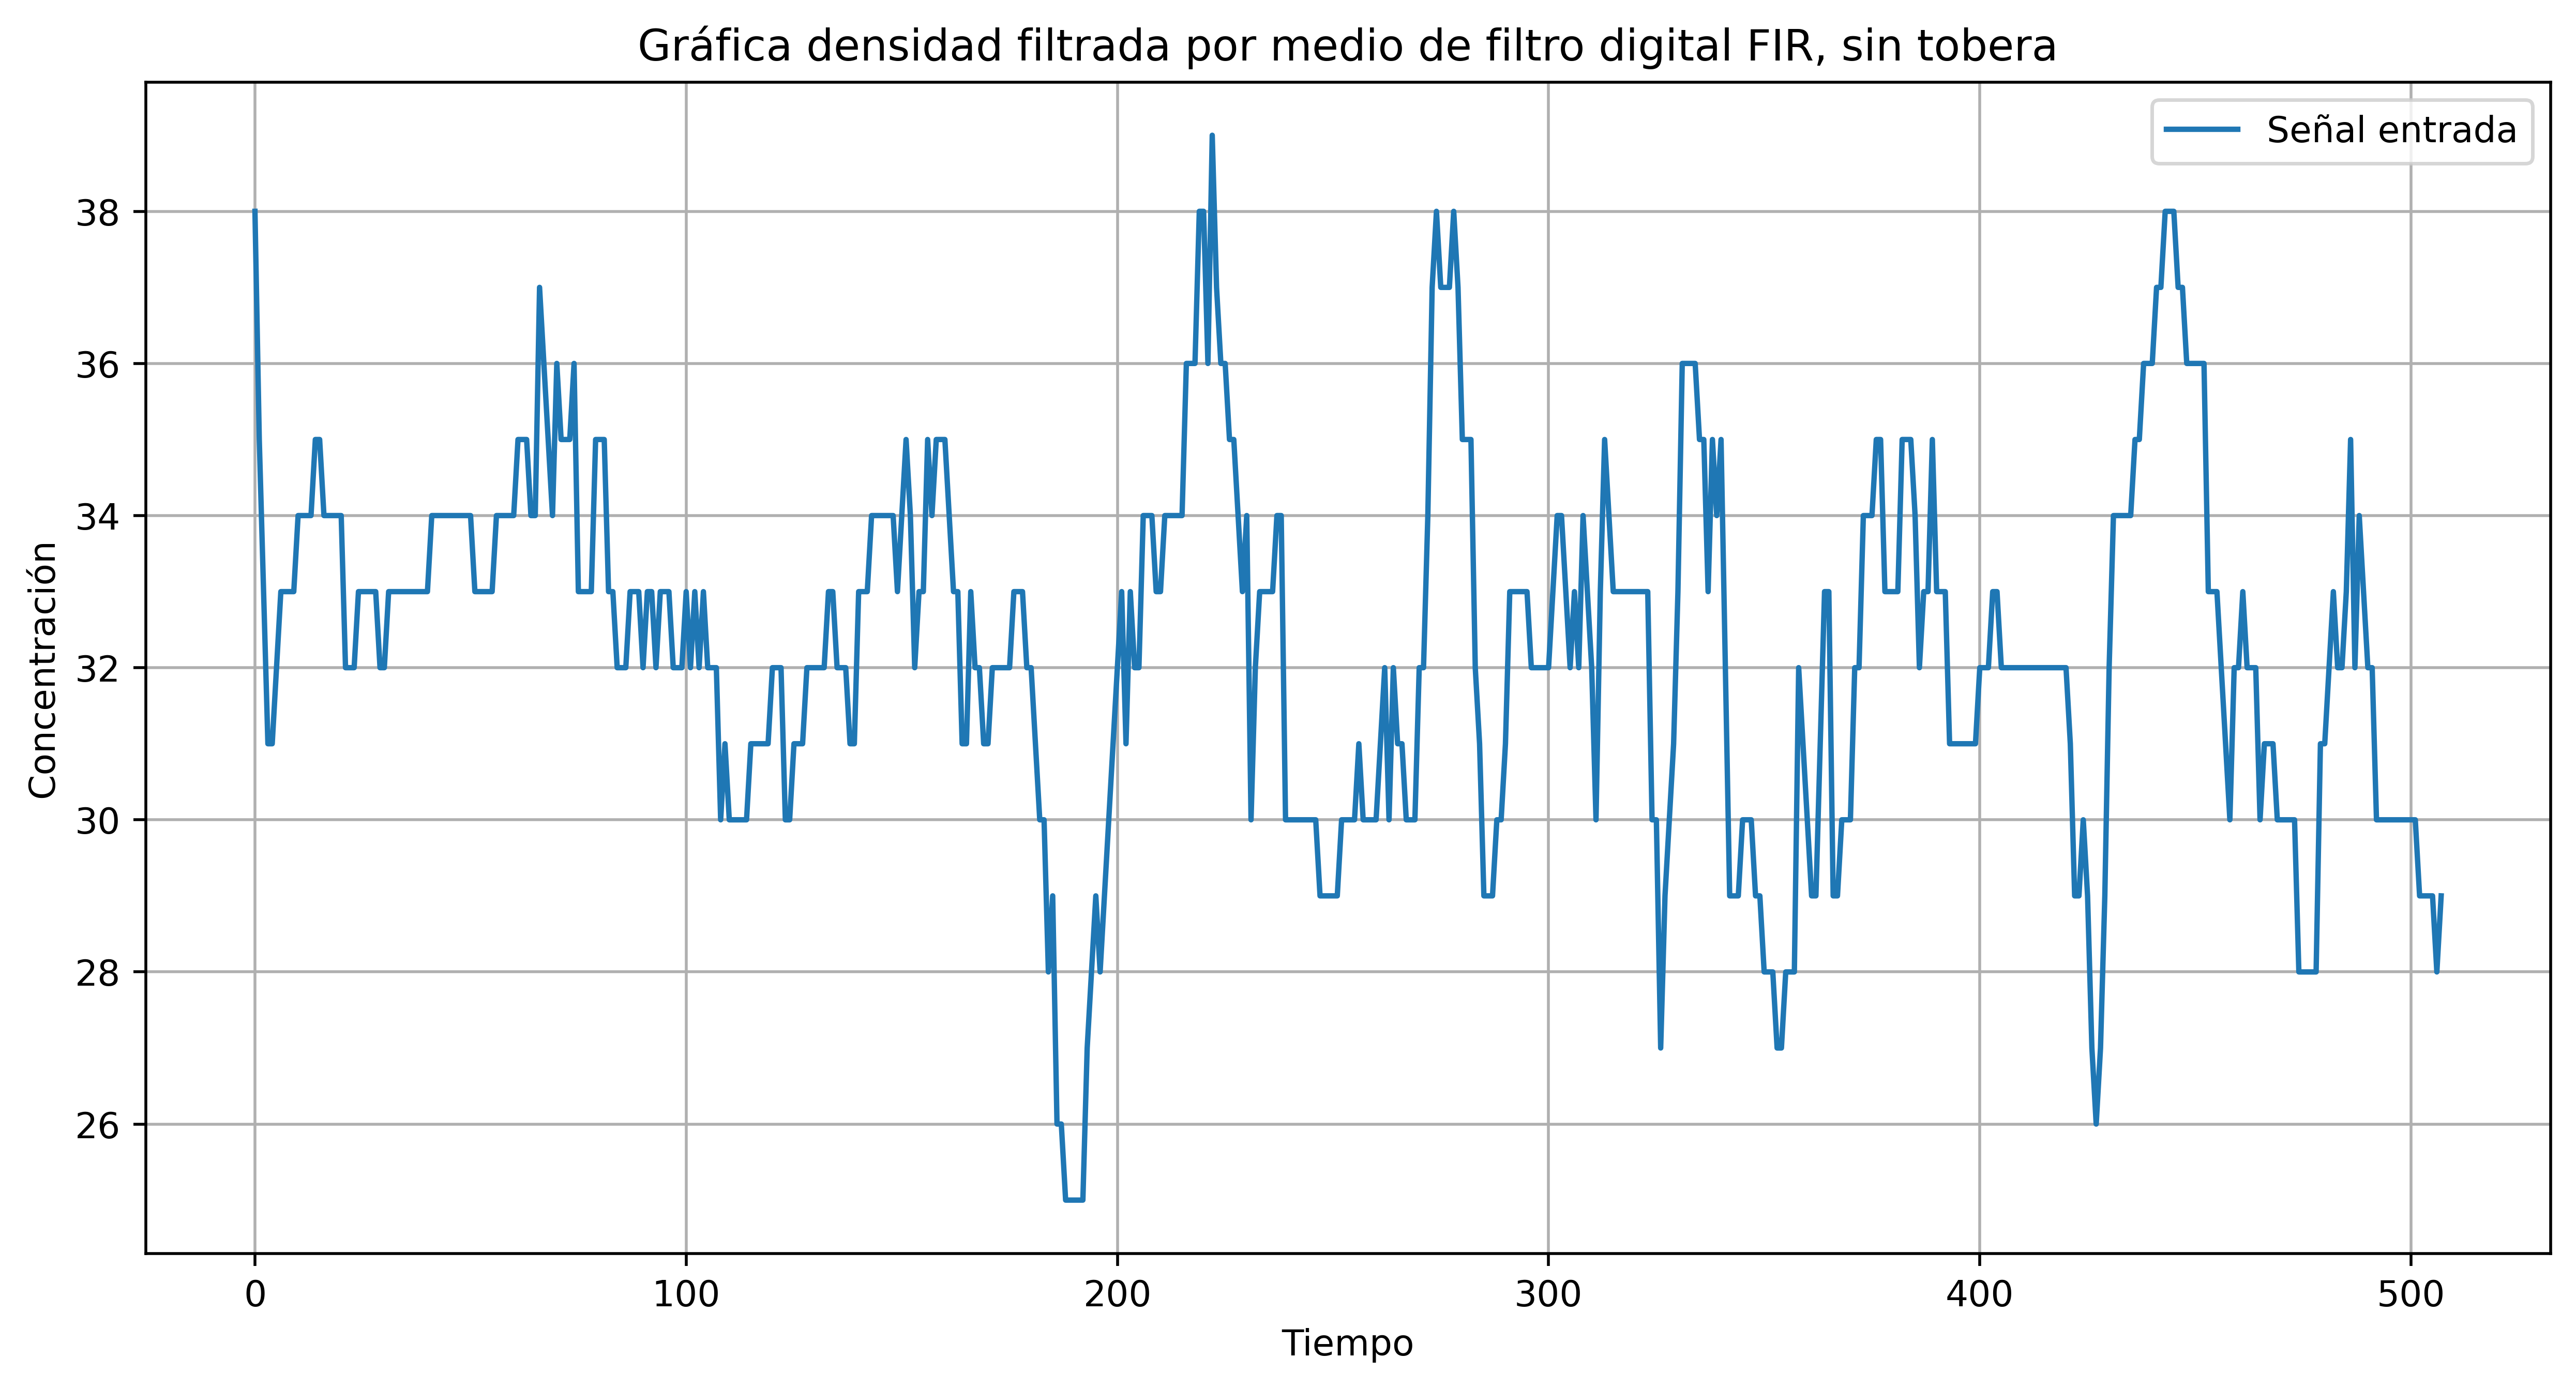

In [22]:
# Sin Tobera

dataFiltrada = np.convolve(sinTobera.Concentracion[:], h, mode='full')

datos_no_graficar = int((len(dataFiltrada)-len(sinTobera.Concentracion))/2)

plt.figure(figsize=(12,6), dpi = 500)
plt.title("Gráfica densidad filtrada por medio de filtro digital FIR, sin tobera")
plt.plot(sinTobera.Concentracion[:], label='Señal entrada')
# plt.plot(sinTobera.SenalFondo[512:], label='Señal de fondo')
# plt.plot(dataFiltrada[datos_no_graficar:-datos_no_graficar], color='red', label='Datos filtrados pasa bajas')

plt.xlabel('Tiempo')
plt.ylabel('Concentración')
plt.legend()
plt.grid()
plt.show()

## Tobera transparente

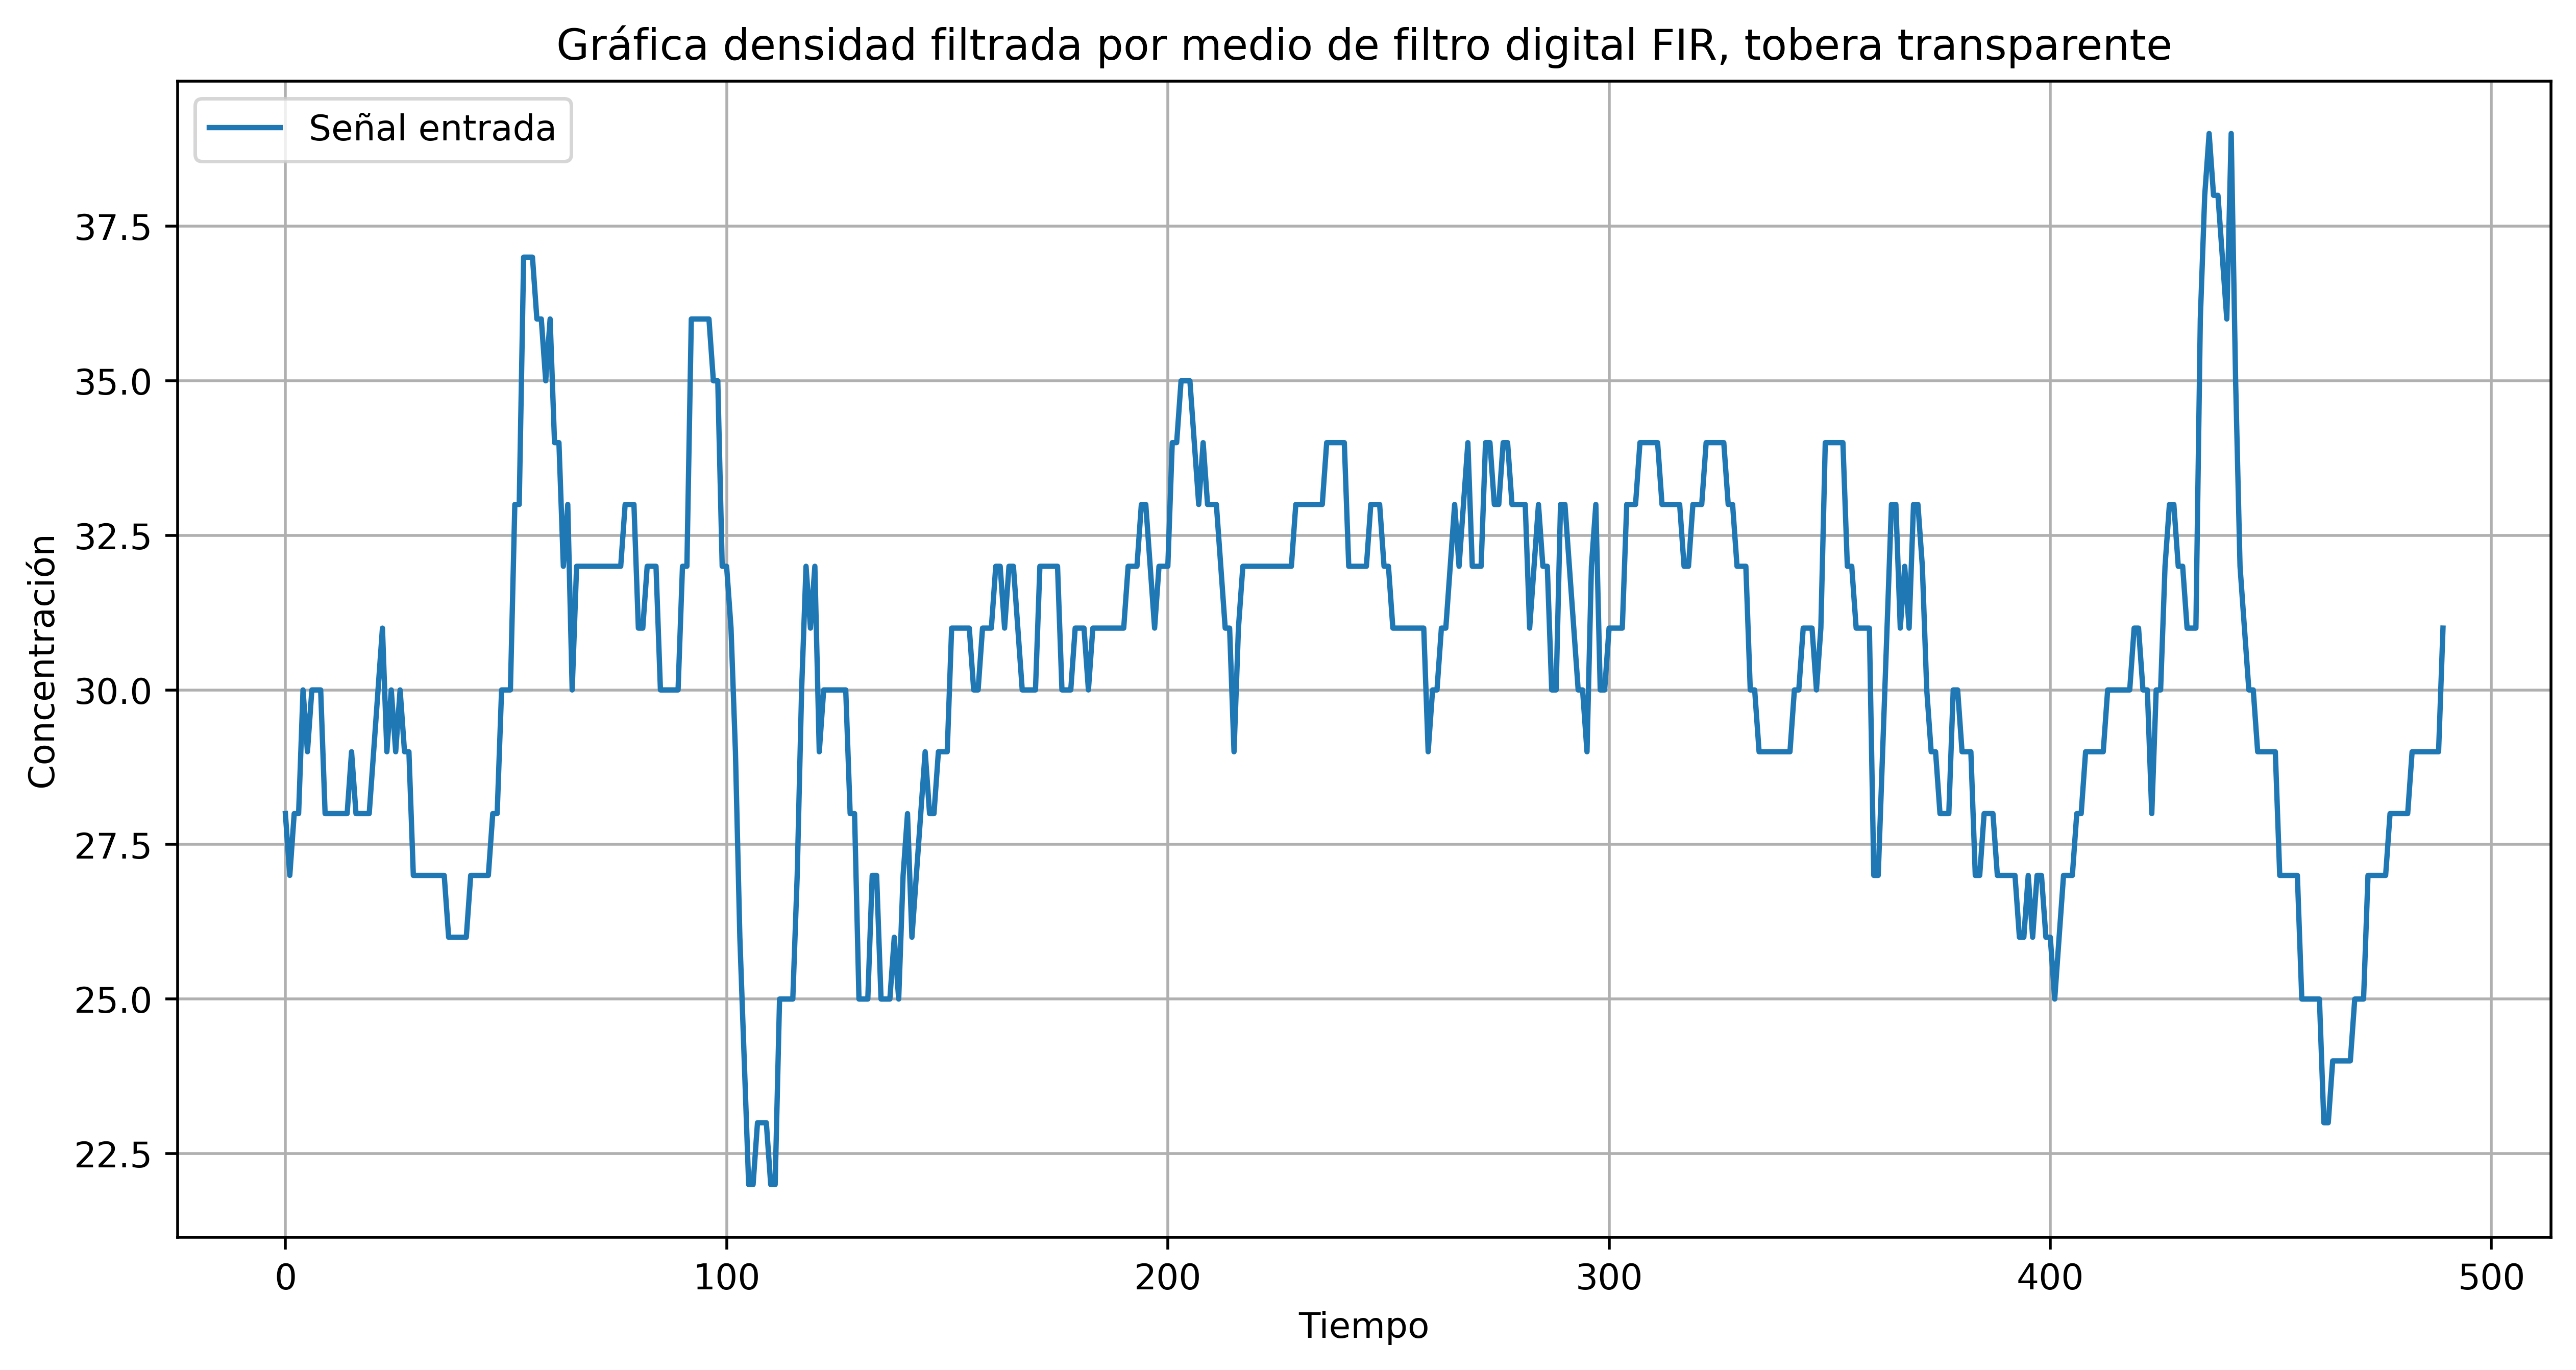

In [23]:
# Tobera Transparente

dataFiltrada = np.convolve(toberaTransparente.Concentracion[:], h, mode='full')

datos_no_graficar = int((len(dataFiltrada)-len(toberaTransparente.Concentracion))/2)

plt.figure(figsize=(12,6), dpi=500)
plt.title("Gráfica densidad filtrada por medio de filtro digital FIR, tobera transparente")
plt.plot(toberaTransparente.Concentracion[:], label='Señal entrada')
# plt.plot(toberaTransparente.SenalFondo[512:], label='Señal de fondo')
# plt.plot(dataFiltrada[datos_no_graficar:-datos_no_graficar], color='red', label='Datos filtrados pasa bajas')

plt.xlabel('Tiempo')
plt.ylabel('Concentración')
plt.legend()
plt.grid()
plt.show()

## Tobera blanca

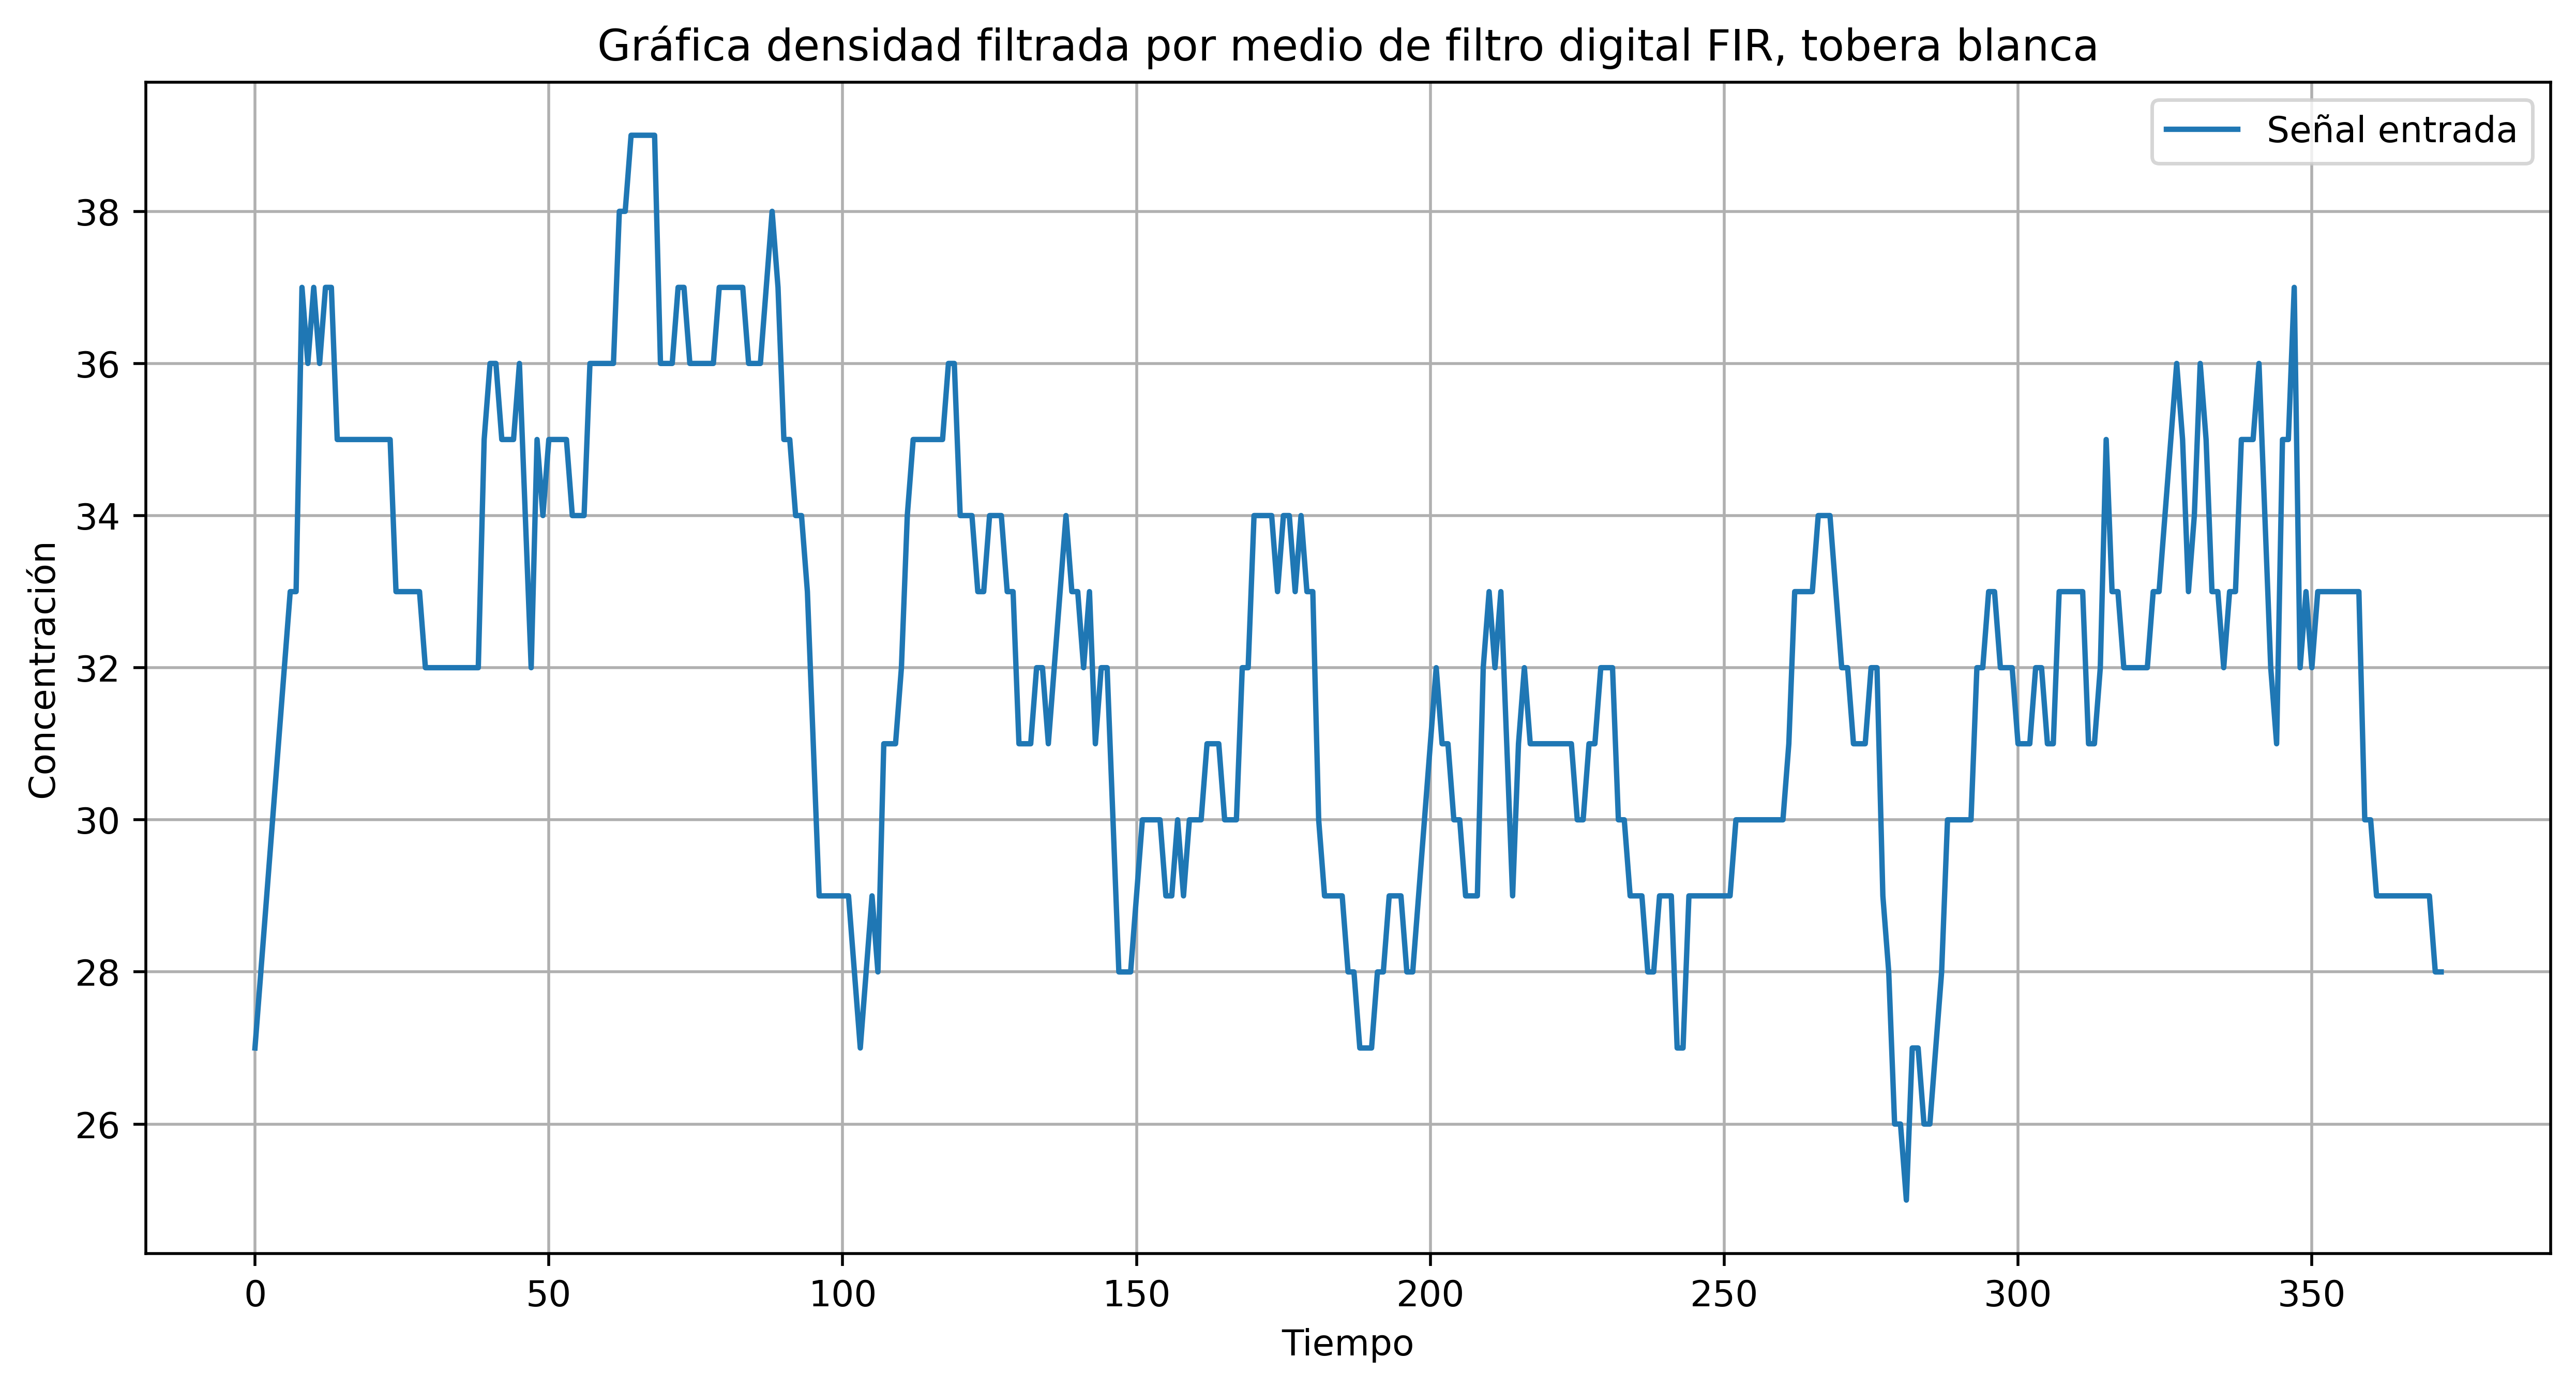

In [24]:
# Tobera Blanca

dataFiltrada = np.convolve(toberaBlanca.Concentracion[:], h, mode='full')

datos_no_graficar = int((len(dataFiltrada)-len(toberaBlanca.Concentracion))/2)

plt.figure(figsize=(12,6), dpi=500)
plt.title("Gráfica densidad filtrada por medio de filtro digital FIR, tobera blanca")
plt.plot(toberaBlanca.Concentracion[:], label='Señal entrada')
# plt.plot(toberatoberaBlanca.SenalFondo[512:], label='Señal de fondo')
# plt.plot(dataFiltrada[datos_no_graficar:-datos_no_graficar], color='red', label='Datos filtrados pasa bajas')

plt.xlabel('Tiempo')
plt.ylabel('Concentración')
plt.legend()
plt.grid()
plt.show()